<a href="https://colab.research.google.com/github/vincentjunitio00/Linear-Regression-Scratch/blob/main/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Create dataset

In [2]:
np.random.seed(42)

X, y = make_regression(n_samples=100, n_features=1)

# Define Linear Regression and Conduct training

In [3]:
class LinearRegression:
  def __init__(self, learning_rate=0.001, max_iteration=100):
      """Initialize constructor.

      Keyword arguments:
      learning_rate -- the learning rate of the model (default 0.001)
      max_iteration -- the maximum looping iteration to run (default 100)
      """
      self.learning_rate = learning_rate
      self.max_iteration = max_iteration
  
  def initialize_parameters(self, X):
      """Initialize parameters.

      Keyword arguments:
      X -- the training data of size (n_samples, n_features)

      Return:
      W -- the weight of the model of size (n_features, 1)
      b -- the bias of the model
      """
      self.W = np.zeros((X.shape[1], 1))
      self.b = 1
      self.cost = []           # To save the cost value for each iteration
      return self.W, self.b
  
  def compute_hypothesis(self, X):
      """Compute hypothesis function.

      Keyword arguments:
      X -- the training data of size (n_samples, n_features)

      Return:
      h -- the dot product of weight and X added with bias of size (1, n_samples)
      """
      h = np.dot(self.W.T, X.T) + self.b
      return h
  
  def compute_cost(self, h, y):
      """Compute cost function.

      Keyword arguments:
      h -- the dot product of weight and X added with bias of size (1, n_samples)
      y -- the training label of size (n_samples, )

      Return:
      cost -- the cost function
      """
      cost = (1 / 2 * len(y)) * np.sum((h - y.reshape(1, -1))**2)
      return cost

  def gradient_descent(self, h, X, y):
      """Compute the gradient descent.

      Keyword arguments:
      h -- the dot product of weight and X added with bias of size (1, n_samples)
      X -- the training data of size (n_samples, n_features)
      y -- the training label of size (n_samples, )

      Return:
      dW -- gradient of the loss respect to W 
      db -- gradient of the loss respect to b
      """
      dW = (1 / len(y)) * np.sum(np.dot(X.T, (h - y.reshape(1, -1)).T))
      db = (1 / len(y)) * np.sum(h - y.reshape(1, -1))
      return dW, db
  
  def update_weights(self, dW, db):
      """Update the weights.

      Keyword arguments:
      dW -- gradient of the loss respect to W 
      db -- gradient of the loss respect to b
      
      Return:
      W -- the weight of the model of size (n_features, 1)
      b -- the bias of the model
      """
      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db
      return self.W, self.b

  def fit(self, X, y):
      """Fit the training data and label to the model.
      
      Keyword arguments:
      X -- the training data of size (n_samples, n_features)
      y -- the training label of size (n_samples, )

      Return:
      W -- the weight of the model (after training) of size (n_features, 1)
      b -- the bias of the model (after training)
      """
      self.initialize_parameters(X)

      for iter in range(self.max_iteration):
        h = self.compute_hypothesis(X)
        self.cost.append(self.compute_cost(h, y))
        dW, db = self.gradient_descent(h, X, y)
        self.W, self.b = self.update_weights(dW, db)
      return self.W, self.b
  
  def predict(self, X):
      """Predict the data with the trained model.

      Keyword arguments:
      X -- the training data of size (n_samples, n_features)

      Return:
      predictions -- the predicted labels (list)
      """
      predictions = []
      for case in X:
        prediction = np.dot(self.W, case) + self.b
        predictions.extend(prediction)
      return predictions

# Instantiate LinearRegression
linreg = LinearRegression(0.03, 200)

# Fit the data to the model
linreg.fit(X, y)

(array([[41.42837803]]), -0.1122595883106603)

# Plot the cost over iterations

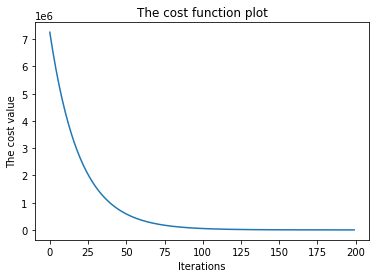

In [4]:
plt.title('The cost function plot')
plt.plot(linreg.cost)
plt.xlabel('Iterations')
plt.ylabel('The cost value')
plt.show()

# Predict data

In [5]:
linreg.predict([[4], [5]])

[165.60125252664162, 207.02963055537967]

# Plot the hypothesis function

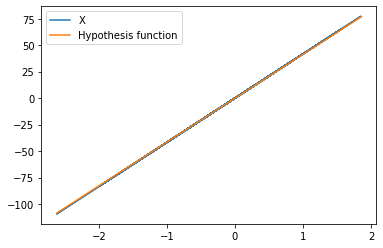

In [6]:
# Since the hypothesis function will be
# hypothesis_function = W * x + b
# find two values (minimum and maximum of X) to get the points
# connect the points

minimum = min(X)
maximum = max(X)

plt.plot(X[:, 0], y, label = "X")
plt.plot([minimum, maximum], [linreg.predict([minimum]), \
                              linreg.predict([maximum])], \
                              label = "Hypothesis function")
plt.legend()
plt.show()